In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

print("=== MACHINE LEARNING MODEL TRAINING ===")

# Load preprocessed data and objects
scaler = joblib.load('../models/scaler.pkl')
target_encoder = joblib.load('../models/target_encoder.pkl')
feature_names = joblib.load('../models/feature_names.pkl')

# Recreate the preprocessing (or load if you saved the split data)
df = pd.read_csv('../data/placementdata.csv')
# ... (apply same preprocessing as before to get X_train_scaled, X_test_scaled, y_train, y_test)


=== MACHINE LEARNING MODEL TRAINING ===


In [7]:
print("=== INITIALIZING MACHINE LEARNING MODELS ===")

# Dictionary of models to compare
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,    # Number of trees
        random_state=42,     # For reproducibility
        max_depth=10         # Prevent overfitting
    ),
    'Logistic Regression': LogisticRegression(
        random_state=42,
        max_iter=1000       # Enough iterations for convergence
    ),
    'Support Vector Machine': SVC(
        kernel='rbf',       # Radial basis function kernel
        random_state=42,
        probability=True    # Enable probability predictions
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        n_neighbors=5       # Number of neighbors to consider
    ),
    'Decision Tree': DecisionTreeClassifier(
        random_state=42,
        max_depth=10        # Prevent overfitting
    ),
    'Naive Bayes': GaussianNB()
}

print(f"Initialized {len(models)} models for comparison:")
for name in models.keys():
    print(f"- {name}")


=== INITIALIZING MACHINE LEARNING MODELS ===
Initialized 6 models for comparison:
- Random Forest
- Logistic Regression
- Support Vector Machine
- K-Nearest Neighbors
- Decision Tree
- Naive Bayes


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# === LOAD DATA ===
df = pd.read_csv("../data/placementdata.csv")  # change filename if needed

# === ENCODING CATEGORICAL COLUMNS ===
categorical_cols = ["ExtracurricularActivities", "PlacementTraining"]
for col in categorical_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# Encode target column
target_encoder = LabelEncoder()
df["PlacementStatus_encoded"] = target_encoder.fit_transform(df["PlacementStatus"])

# === FEATURES & TARGET ===
X = df.drop(["StudentID", "PlacementStatus", "PlacementStatus_encoded"], axis=1)
y = df["PlacementStatus_encoded"]

# === TRAIN-TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === SCALE NUMERIC FEATURES ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === DEFINE MODELS ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

print("=== TRAINING AND EVALUATING MODELS ===")

results = {}
trained_models = {}
detailed_results = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Store results
    results[name] = test_accuracy
    trained_models[name] = model
    detailed_results[name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'cv_scores': cv_scores
    }
    
    # Print results
    print(f"✅ {name} Results:")
    print(f"   Train Accuracy: {train_accuracy:.4f}")
    print(f"   Test Accuracy: {test_accuracy:.4f}")
    print(f"   CV Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    
    print("   Classification Report:")
    target_names = target_encoder.classes_
    print(classification_report(y_test, y_pred_test, target_names=target_names, zero_division=0))


=== TRAINING AND EVALUATING MODELS ===

🔄 Training Logistic Regression...
✅ Logistic Regression Results:
   Train Accuracy: 0.7979
   Test Accuracy: 0.8085
   CV Mean: 0.7967 (+/- 0.0152)
   Classification Report:
              precision    recall  f1-score   support

   NotPlaced       0.84      0.83      0.83      1161
      Placed       0.77      0.78      0.77       839

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000


🔄 Training Random Forest...
✅ Random Forest Results:
   Train Accuracy: 0.9991
   Test Accuracy: 0.7875
   CV Mean: 0.7849 (+/- 0.0171)
   Classification Report:
              precision    recall  f1-score   support

   NotPlaced       0.81      0.83      0.82      1161
      Placed       0.76      0.72      0.74       839

    accuracy                           0.79      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.79 

=== MODEL PERFORMANCE COMPARISON ===
                 Model  Test_Accuracy  CV_Mean  CV_Std  Overfitting
0  Logistic Regression         0.8085   0.7968  0.0076      -0.0106
2                  SVM         0.7990   0.7958  0.0077       0.0102
1        Random Forest         0.7875   0.7849  0.0085       0.2116


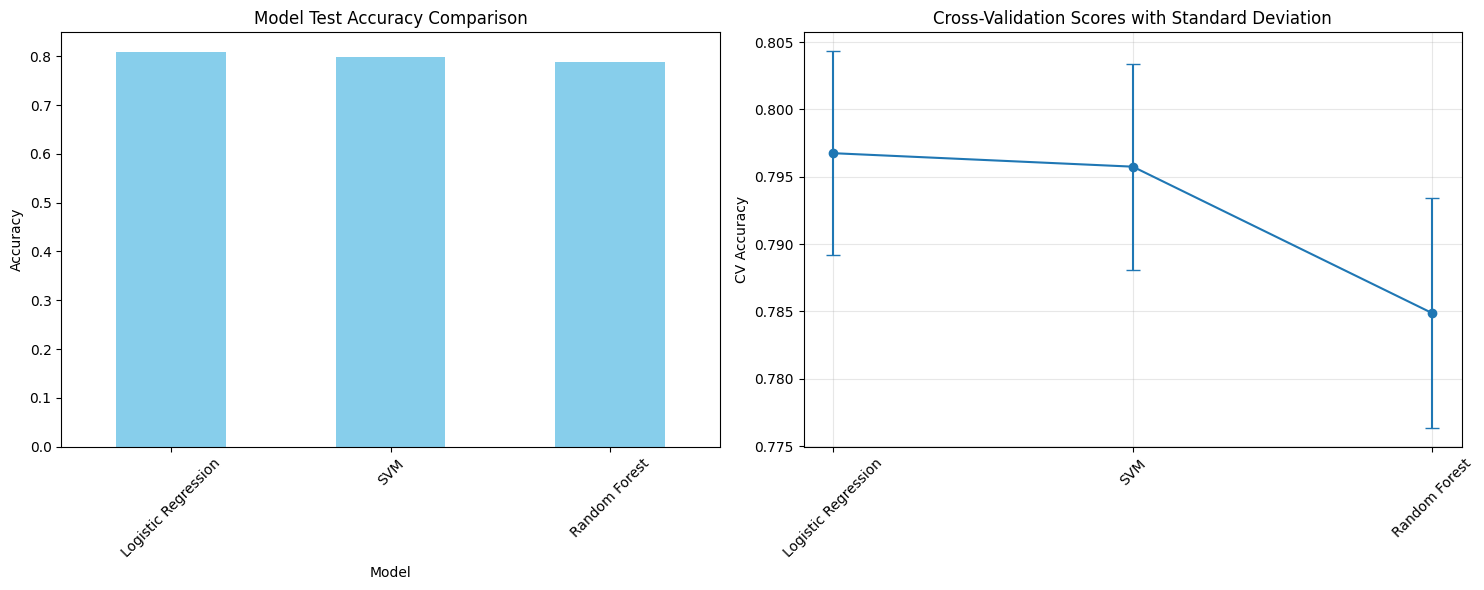


🏆 BEST MODEL: Logistic Regression
   Test Accuracy: 0.8085
   This model will be used for deployment!


In [14]:
print("=== MODEL PERFORMANCE COMPARISON ===")

# Create comparison DataFrame
comparison_data = []
for name, details in detailed_results.items():
    comparison_data.append({
        'Model': name,
        'Test_Accuracy': details['test_accuracy'],
        'CV_Mean': details['cv_mean'],
        'CV_Std': details['cv_std'],
        'Overfitting': details['train_accuracy'] - details['test_accuracy']
    })

results_df = pd.DataFrame(comparison_data)
results_df = results_df.sort_values('Test_Accuracy', ascending=False)
print(results_df.round(4))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Test accuracy comparison
results_df.plot(x='Model', y='Test_Accuracy', kind='bar', ax=axes[0], 
                color='skyblue', legend=False)
axes[0].set_title('Model Test Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=45)

# Cross-validation scores with error bars
axes[1].errorbar(range(len(results_df)), results_df['CV_Mean'], 
                yerr=results_df['CV_Std'], marker='o', capsize=5)
axes[1].set_xticks(range(len(results_df)))
axes[1].set_xticklabels(results_df['Model'], rotation=45)
axes[1].set_title('Cross-Validation Scores with Standard Deviation')
axes[1].set_ylabel('CV Accuracy')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Select best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_test_accuracy = results_df.iloc[0]['Test_Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test Accuracy: {best_test_accuracy:.4f}")
print(f"   This model will be used for deployment!")


=== FEATURE IMPORTANCE ANALYSIS ===
Top 10 Most Important Features (by coefficient magnitude):
                     Feature  Coefficient  Abs_Coefficient
4          AptitudeTestScore     0.610808         0.610808
7          PlacementTraining     0.391990         0.391990
6  ExtracurricularActivities     0.360371         0.360371
8                  SSC_Marks     0.282628         0.282628
5           SoftSkillsRating     0.263450         0.263450
0                       CGPA     0.257470         0.257470
2                   Projects     0.254356         0.254356
9                  HSC_Marks     0.221181         0.221181
3   Workshops/Certifications     0.095102         0.095102
1                Internships    -0.010932         0.010932


C:\Users\CHINTHA GAYATRI DEVI\AppData\Local\Temp\ipykernel_29724\1282255015.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Abs_Coefficient', palette='coolwarm')


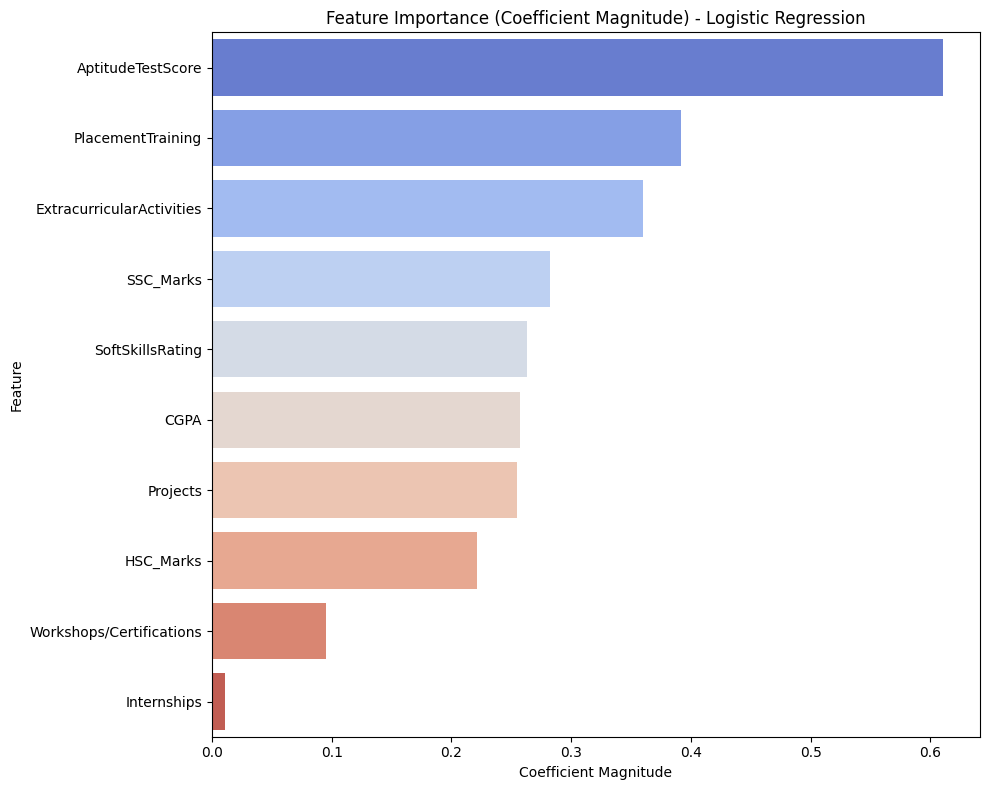


💾 Best model (Logistic Regression) saved successfully!
All results and comparison data saved!


In [17]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("=== FEATURE IMPORTANCE ANALYSIS ===")

# Ensure feature_names matches the columns in X_train_scaled
feature_names = X_train.columns.tolist()  # Use actual feature names from training data

# Tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))
    
    # Visualization
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

# Linear models (Logistic Regression, SVM with linear kernel)
elif hasattr(best_model, 'coef_'):
    coef = best_model.coef_
    
    # Handle multi-class by taking mean across classes
    if coef.ndim > 1:
        coef = coef.mean(axis=0)
    
    # Make sure lengths match
    if len(feature_names) != len(coef):
        raise ValueError(f"Feature length ({len(feature_names)}) != Coef length ({len(coef)})")
    
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coef
    })
    feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
    feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
    
    print("Top 10 Most Important Features (by coefficient magnitude):")
    print(feature_importance.head(10))
    
    # Visualization
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    sns.barplot(data=top_features, y='Feature', x='Abs_Coefficient', palette='coolwarm')
    plt.title(f'Feature Importance (Coefficient Magnitude) - {best_model_name}')
    plt.xlabel('Coefficient Magnitude')
    plt.tight_layout()
    plt.show()

# Save everything
joblib.dump(best_model, '../models/best_model.pkl')
joblib.dump(results_df, '../models/model_comparison.pkl')
joblib.dump(detailed_results, '../models/detailed_results.pkl')

print(f"\n💾 Best model ({best_model_name}) saved successfully!")
print("All results and comparison data saved!")


=== MACHINE LEARNING MODEL TRAINING ===

Dataset loaded
Shape: (10000, 12)
Columns: ['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus']
   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3   

C:\Users\CHINTHA GAYATRI DEVI\AppData\Local\Temp\ipykernel_23844\3479109203.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Test_Accuracy", palette="Blues_d")


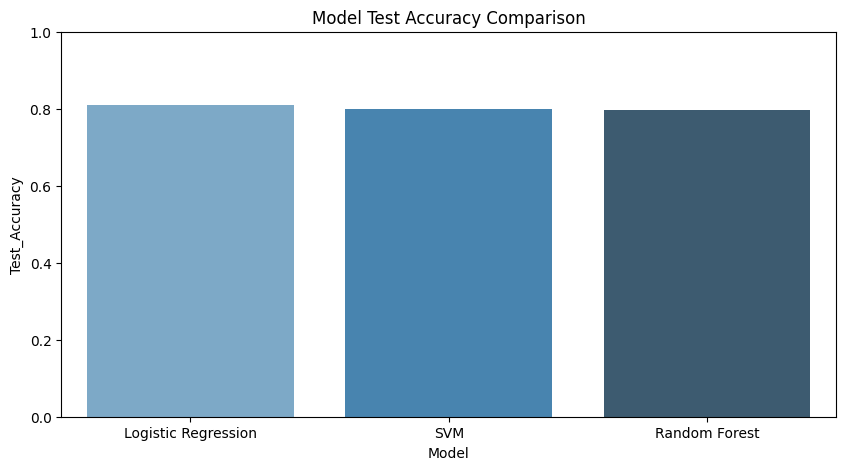

🏆 BEST MODEL: Logistic Regression
Top 10 Important Features by coefficient magnitude:
                             Feature  Coefficient  Abs_Coefficient
6                  AptitudeTestScore     0.610808         0.610808
1          PlacementTraining_encoded     0.391990         0.391990
0  ExtracurricularActivities_encoded     0.360371         0.360371
8                          SSC_Marks     0.282628         0.282628
7                   SoftSkillsRating     0.263450         0.263450
2                               CGPA     0.257470         0.257470
4                           Projects     0.254356         0.254356
9                          HSC_Marks     0.221181         0.221181
5           Workshops/Certifications     0.095102         0.095102
3                        Internships    -0.010932         0.010932


C:\Users\CHINTHA GAYATRI DEVI\AppData\Local\Temp\ipykernel_23844\3479109203.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), y="Feature", x="Abs_Coefficient", palette="coolwarm")


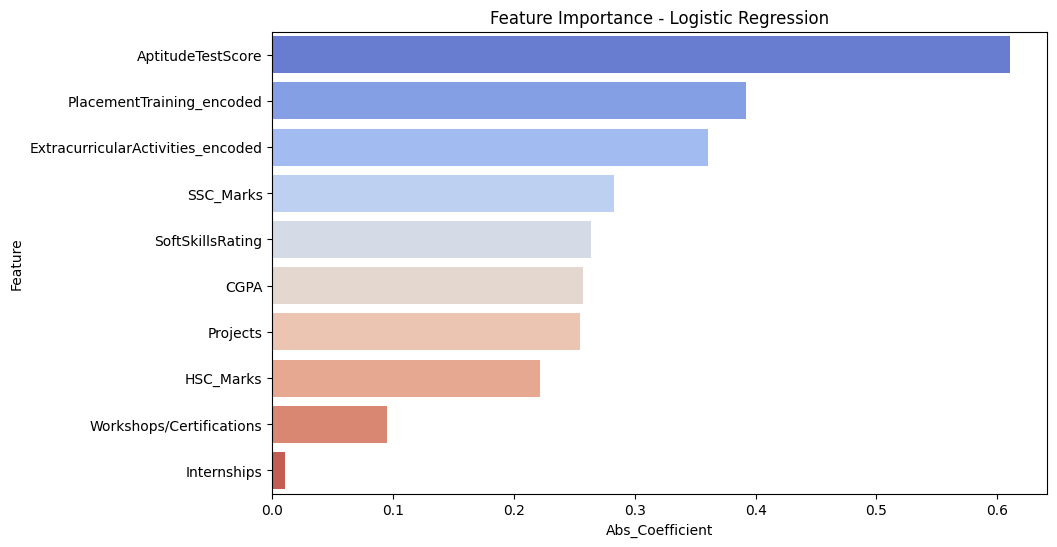

💾 Best model (Logistic Regression) and all results saved successfully!


In [2]:
###ALL IN ONE


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

print("=== MACHINE LEARNING MODEL TRAINING ===\n")

# 1️⃣ Load dataset
df = pd.read_csv("../data/placementdata.csv")
print("Dataset loaded")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(), "\n")

# 2️⃣ Load preprocessing objects
scaler = joblib.load("../models/scaler.pkl")
print("Scaler loaded")
target_encoder = joblib.load("../models/target_encoder.pkl")
print("Target encoder loaded")
label_encoders = joblib.load("../models/label_encoders.pkl")
print("Label encoders loaded:", list(label_encoders.keys()))
feature_names = joblib.load("../models/feature_names.pkl")
print("Feature names loaded:", feature_names, "\n")

# 3️⃣ Apply same encoding as preprocessing
for col, le in label_encoders.items():
    df[col + "_encoded"] = le.transform(df[col])
    print(f"Encoded '{col}' → '{col}_encoded'")
    print(df[[col, col + "_encoded"]].head(), "\n")

# Encode target
df["status_encoded"] = target_encoder.transform(df["PlacementStatus"])
print("Target encoded 'PlacementStatus' → 'status_encoded'")
print(df[["PlacementStatus", "status_encoded"]].head(), "\n")

# 4️⃣ Prepare features & target
X = df[feature_names]
y = df["status_encoded"]
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape, "\n")

# 5️⃣ Scale features
X_scaled = scaler.transform(X)
print("Features scaled")
print("Sample of scaled features:\n", X_scaled[:5], "\n")

# 6️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("Train-test split done")
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts(), "\n")

# 7️⃣ Define 3 models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10),
    "SVM": SVC(probability=True, random_state=42)
}
print("Initialized models:", list(models.keys()), "\n")

# 8️⃣ Train, evaluate, and store results
results = {}
trained_models = {}
detailed_results = {}

for name, model in models.items():
    print(f"🔄 Training {name}...")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Accuracy
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Store results
    results[name] = test_acc
    trained_models[name] = model
    detailed_results[name] = {
        "train_acc": train_acc,
        "test_acc": test_acc,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std(),
        "cv_scores": cv_scores
    }
    
    # Print results
    print(f"✅ {name} Results:")
    print(f"   Train Accuracy: {train_acc:.4f}")
    print(f"   Test Accuracy: {test_acc:.4f}")
    print(f"   CV Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    print("   Classification Report:")
    print(classification_report(y_test, y_pred_test, target_names=target_encoder.classes_, zero_division=0), "\n")

# 9️⃣ Compare models
comparison_data = []
for name, details in detailed_results.items():
    comparison_data.append({
        "Model": name,
        "Test_Accuracy": details["test_acc"],
        "CV_Mean": details["cv_mean"],
        "CV_Std": details["cv_std"],
        "Overfitting": details["train_acc"] - details["test_acc"]
    })

results_df = pd.DataFrame(comparison_data).sort_values("Test_Accuracy", ascending=False)
print("=== MODEL PERFORMANCE COMPARISON ===")
print(results_df.round(4), "\n")

# 1️⃣0️⃣ Visualize comparison
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x="Model", y="Test_Accuracy", palette="Blues_d")
plt.title("Model Test Accuracy Comparison")
plt.ylim(0,1)
plt.show()

# 1️⃣1️⃣ Feature importance for tree-based or linear models
best_model_name = results_df.iloc[0]["Model"]
best_model = trained_models[best_model_name]
print(f"🏆 BEST MODEL: {best_model_name}")

if hasattr(best_model, "feature_importances_"):
    feature_importance = pd.DataFrame({
        "Feature": feature_names,
        "Importance": best_model.feature_importances_
    }).sort_values("Importance", ascending=False)
    print("Top 10 Important Features:")
    print(feature_importance.head(10))
    plt.figure(figsize=(10,6))
    sns.barplot(data=feature_importance.head(10), y="Feature", x="Importance", palette="viridis")
    plt.title(f"Feature Importance - {best_model_name}")
    plt.show()
elif hasattr(best_model, "coef_"):
    coef = best_model.coef_
    if coef.ndim > 1: coef = coef.mean(axis=0)
    feature_importance = pd.DataFrame({
        "Feature": feature_names,
        "Coefficient": coef
    })
    feature_importance["Abs_Coefficient"] = np.abs(feature_importance["Coefficient"])
    feature_importance = feature_importance.sort_values("Abs_Coefficient", ascending=False)
    print("Top 10 Important Features by coefficient magnitude:")
    print(feature_importance.head(10))
    plt.figure(figsize=(10,6))
    sns.barplot(data=feature_importance.head(10), y="Feature", x="Abs_Coefficient", palette="coolwarm")
    plt.title(f"Feature Importance - {best_model_name}")
    plt.show()

# 1️⃣2️⃣ Save best model and results
joblib.dump(best_model, "../models/best_model.pkl")
joblib.dump(results_df, "../models/model_comparison.pkl")
joblib.dump(detailed_results, "../models/detailed_results.pkl")
print(f"💾 Best model ({best_model_name}) and all results saved successfully!")
